In [49]:
#%% Imports
import os
import shutil
import nibabel as nib
import numpy as np
from glob import glob
from scipy import ndimage
from nilearn.image import resample_to_img, resample_img
from nilearn.masking import compute_background_mask, compute_epi_mask
from nilearn.plotting import plot_roi, plot_epi

In [28]:
os.chdir('/home/uziel/DISS')
root = './data_processed/ISLES2017/training'
root_2 = './data/ISLES2017/training'
labels = [y for x in os.walk(root)
          for y in glob(os.path.join(x[0], '*OT*.nii.gz'))
         if 'clone' not in x[0]]
labels_original = sorted([y for x in os.walk(root_2)
                   for y in glob(os.path.join(x[0], '*OT*.nii'))])

for label in labels:
    label_original = [x for x in labels_original if os.path.basename(label).split('.')[-3] in x][0]
    print("Label: " + os.path.basename(label) + '. Label original :' + os.path.basename(label_original))
    label_img = nib.load(label)
    label_data = label_img.get_data()
    label_original_img = nib.load(label_original)
    label_original_data = label_original_img.get_data()
    print("Label N: " + str(label_data.size) + '. Label original N: ' + str(label_original_data.size))
    zero_elements = np.sum(label_data == 0)
    one_elements = np.sum(label_data == 1)
    zero_elements_original = np.sum(label_original_data == 0)
    one_elements_original = np.sum(label_original_data == 1)
    other_elements = label_data.size - zero_elements - one_elements
    other_elements_original = label_original_data.size - zero_elements_original - one_elements_original
    print("Label Zero: " + str(zero_elements) + ". Label One: " + str(one_elements) + ". Ratio: " + str(float(one_elements)/zero_elements * 100) + '. Other: ' + str(other_elements))
    print("Label Original Zero: "+ str(zero_elements_original) + ". Label Original One: " + str(one_elements_original) + ". Ratio: " + str(float(one_elements_original)/zero_elements_original * 100) + '. Other: ' + str(other_elements_original))
    print("")
    

Label: SMIR.Brain.XX.O.OT.188882.nii.gz. Label original :SMIR.Brain.XX.O.OT.188882.nii
Label N: 7221032. Label original N: 409600
Label Zero: 7137507. Label One: 83525. Ratio: 1.17022652307. Other: 0
Label Original Zero: 404627. Label Original One: 4973. Ratio: 1.22903315893. Other: 0

Label: VSD.Brain.XX.O.OT.128051.nii.gz. Label original :VSD.Brain.XX.O.OT.128051.nii
Label N: 7221032. Label original N: 409600
Label Zero: 7217764. Label One: 3268. Ratio: 0.0452771800242. Other: 0
Label Original Zero: 409406. Label Original One: 194. Ratio: 0.0473857246841. Other: 0

Label: VSD.Brain.XX.O.OT.128060.nii.gz. Label original :VSD.Brain.XX.O.OT.128060.nii
Label N: 7221032. Label original N: 700416
Label Zero: 7220595. Label One: 437. Ratio: 0.00605213282285. Other: 0
Label Original Zero: 700368. Label Original One: 48. Ratio: 0.00685353985333. Other: 0

Label: VSD.Brain.XX.O.OT.128055.nii.gz. Label original :VSD.Brain.XX.O.OT.128055.nii
Label N: 7221032. Label original N: 1572864
Label Zero

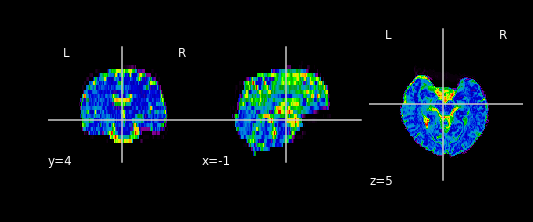

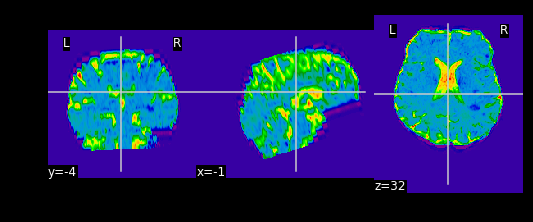

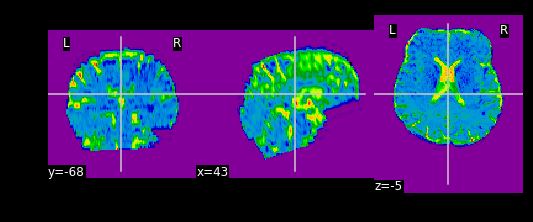

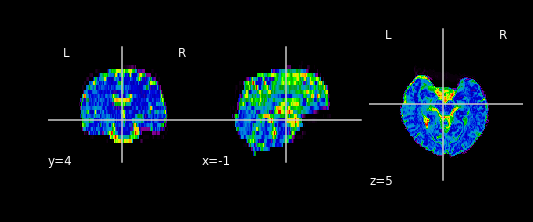

In [70]:
path = '/home/uziel/DISS/data/ISLES2017/training/training_46/SMIR.Brain.XX.O.MR_ADC.188985/SMIR.Brain.XX.O.MR_ADC.188985.nii'
template = '/home/uziel/DISS/data/MNI152_T1_1mm_brain.nii.gz'

# Load images
img = nib.load(path)
template = nib.load(template)
# Resample image to template
img_to_template_1 = resample_to_img(img, template)
img_to_template_2 = resample_img(img_to_template_1, 3*img_to_template_1.affine/2, [2*x/3 for x in img_to_template_1.shape])
#img_to_template_2 = resample_to_img(img, nib.Nifti1Image(img.dataobj, 2*img.affine))

# show results
plot_epi(img)
plot_epi(img_to_template_1)
plot_epi(img_to_template_2)
plot_epi(img)

In [25]:
path = '/home/uziel/DISS/data/ISLES2017/training/training_46/SMIR.Brain.XX.O.MR_ADC.188985/SMIR.Brain.XX.O.MR_ADC.188985.nii'
path2 = '/home/uziel/DISS/data/ISLES2017/training/training_46/SMIR.Brain.XX.O.MR_rCBV.188989/SMIR.Brain.XX.O.MR_rCBV.188989.nii'
img = nib.load(path)
img2 = nib.load(path2)


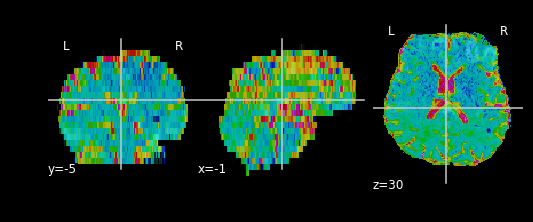

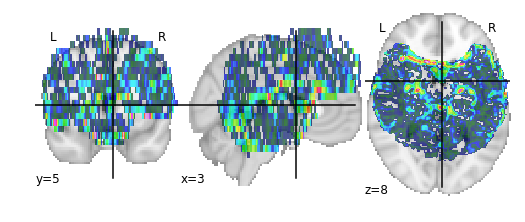

In [29]:
plot_roi(img, img2)
plot_roi(img2)

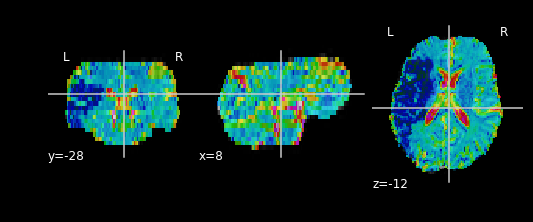

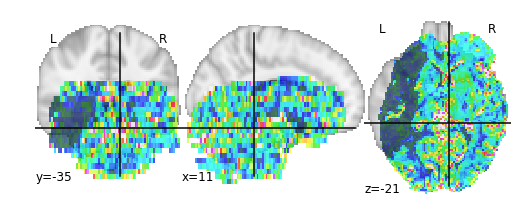

In [30]:
path = '/home/uziel/DISS/data/ISLES2017/training/training_7/VSD.Brain.XX.O.MR_ADC.128047/VSD.Brain.XX.O.MR_ADC.128047.nii'
path2 = '/home/uziel/DISS/data/ISLES2017/training/training_7/VSD.Brain.XX.O.MR_rCBF.127232/VSD.Brain.XX.O.MR_rCBF.127232.nii'
img = nib.load(path)
img2 = nib.load(path2)
plot_roi(img, img2)
plot_roi(img2)